In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)



Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#-------------------- IMPORTS ----------------------

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#-------------------- MODEL ------------------------
n_hidden = 250

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10]) 

W0 = tf.Variable(tf.random_normal([784, n_hidden], stddev=0.01))
B0 = tf.Variable(tf.random_normal([n_hidden], stddev=0.01))

W1 = tf.Variable(tf.random_normal([n_hidden, 10], stddev=0.01))
B1 = tf.Variable(tf.random_normal([10], stddev=0.01))

h = tf.nn.tanh(tf.matmul(x, W0) + B0)
y = tf.nn.tanh(tf.matmul(h, W1) + B1)

mse = tf.reduce_mean(tf.square(y - y_))

train_step = tf.train.AdamOptimizer(0.005).minimize(mse)

In [4]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#---------------------- TRAIN -------------------------
trainLoss = []
testLoss = []
for _ in range(150):
    batch_x, batch_y = mnist.train.next_batch(1000)
    sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})
    
    loss1 = sess.run(mse, feed_dict={x:batch_x, y_:batch_y})
    loss2 = sess.run(mse, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    
    trainLoss.append(loss1)
    testLoss.append(loss2)
print("Training finished!")

Training finished!


In [5]:
#--------------- EVALUATION -----------------------

plt.plot(trainLoss, "r")
plt.plot(testLoss, "y")

correct_predict = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9332


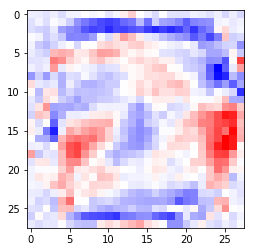

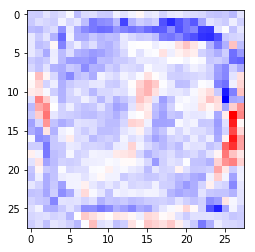

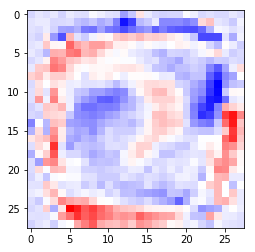

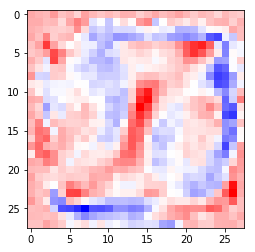

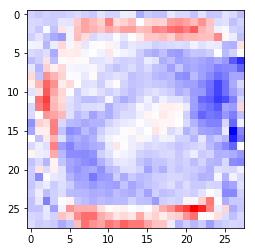

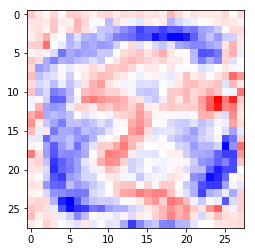

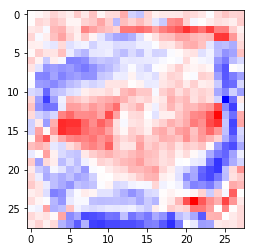

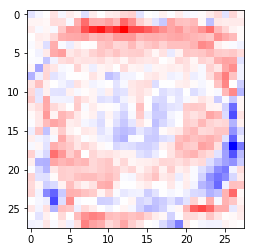

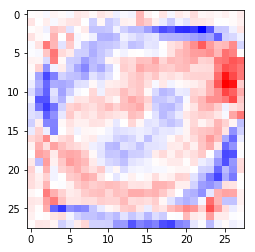

In [7]:
myW = sess.run(W0)

for i in range(10):
    plt.imshow(myW[:, i].reshape(28,28), cmap="bwr")
    plt.show()